In [1]:
#importing packages and identifying/importing csv file
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statistics
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import silhouette_score
warnings.simplefilter(action='ignore')
medical=pd.read_csv('medical_clean.csv')

In [2]:
# profiling dataframe. No null values
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# import statistics package and see where the data characteristics
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Begin identifying duplicates section

In [4]:
# identifying any duplicates
medical.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# seeing full value count of duplicates: no duplicates in file
print(medical.duplicated().value_counts())

False    10000
Name: count, dtype: int64


Begin missing data identification section

In [6]:
# looking into missing data
medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

Begin re-expression of variables section

In [7]:
# recode ReAdmis
medical['ReAdmis_recode']=medical['ReAdmis'].replace({"Yes": 1, "No": 0})

# recode soft drink
medical['Soft_drink_recode']=medical['Soft_drink'].replace({"Yes": 1, "No": 0})

# recode Diabetes
medical['Diabetes_recode']=medical['Diabetes'].replace({"Yes": 1, "No": 0})

# recode stroke
medical['Stroke_recode']=medical['Stroke'].replace({"Yes": 1, "No": 0})

# recode highblood
medical['Highblood_recode']=medical['HighBlood'].replace({"Yes": 1, "No": 0})

# recode arthritis
medical['Arthritis_recode']=medical['Arthritis'].replace({"Yes": 1, "No": 0})

# recode hyperlipidemia
medical['Hyperlipidemia_recode']=medical['Hyperlipidemia'].replace({"Yes": 1, "No": 0})

# recode backpain
medical['BackPain_recode']=medical['BackPain'].replace({"Yes": 1, "No": 0})

# recode anxiety
medical['Anxiety_recode']=medical['Anxiety'].replace({"Yes": 1, "No": 0})

# recode allergic rhinitis
medical['Allergic_rhinitis_recode']=medical['Allergic_rhinitis'].replace({"Yes": 1, "No": 0})

# recode reflux esophagitis
medical['Reflux_esophagitis_recode']=medical['Reflux_esophagitis'].replace({"Yes": 1, "No": 0})

# recode asthma
medical['Asthma_recode']=medical['Asthma'].replace({"Yes": 1, "No": 0})

# recode complication risk
medical['Complication_risk_recode']=medical['Complication_risk'].replace({"Low": 0, "Medium": 1, "High": 2})

# recode overweight
medical['Overweight_recode']=medical['Overweight'].replace({"Yes": 1, "No": 0})

# recode initial admin (emergency)
medical['Emergency_recode']=medical['Initial_admin'].replace({"Emergency Admission": 1, "Elective Admission": 0, 
                                                       "Observation Admission": 0})
# recode initial admin (elective)
medical['Elective_recode']=medical['Initial_admin'].replace({"Emergency Admission": 0, "Elective Admission": 1, 
                                                       "Observation Admission": 0})
# recode initial admin (observation)
medical['Observation_recode']=medical['Initial_admin'].replace({"Emergency Admission": 0, "Elective Admission": 0, 
                                                       "Observation Admission": 1})
# recode services (intravenous)
medical['Intravenous_recode']=medical['Services'].replace({"Intravenous": 1, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 0})
# recode services (CT Scan)
medical['CTScan_recode']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 1, "MRI": 0})
# recode services (MRI)
medical['MRI_recode']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 1})
# recode services (blood work)
medical['BloodWork_recode']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 1, 
                                                       "CT Scan": 0, "MRI": 0})
# recode Area (suburban)
medical['Suburban_recode']=medical['Area'].replace({"Urban": 0, "Rural": 0, 
                                                       "Suburban": 1})
# recode Area (urban)
medical['Urban_recode']=medical['Area'].replace({"Urban": 1, "Rural": 0, 
                                                       "Suburban": 0})
# recode Area (rural)
medical['Rural_recode']=medical['Area'].replace({"Urban": 0, "Rural": 1, 
                                                       "Suburban": 0})
# recode marital (divorced)
medical['Divorced_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 1})
# recode marital (married)
medical['Married_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 1, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 0})
# recode marital (Never married)
medical['NeverMarried_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 0,"Never Married": 1, 
                                                       "Divorced": 0})
# recode marital (widowed)
medical['Widowed_recode']=medical['Marital'].replace({"Widowed": 1, "Married": 0, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 0})
# recode marital (separated)
medical['Separated_recode']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 1,"Never Married": 0, 
                                                       "Divorced": 0})
# recode gender (nonbinary)
medical['Nonbinary_recode']=medical['Gender'].replace({"Male": 0, "Female": 0, "Nonbinary": 1})

# recode gender (male)
medical['Male_recode']=medical['Gender'].replace({"Male": 1, "Female": 0, "Nonbinary": 0})

# recode gender (female)
medical['Female_recode']=medical['Gender'].replace({"Male": 0, "Female": 1, "Nonbinary": 0})

In [8]:
medical_df=medical.drop(['ReAdmis', 'Gender', 'Services', 'Marital', 'Area', 'Initial_admin', 'Soft_drink', 'HighBlood',
                         'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Customer_id', 'Interaction',
                        'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'CaseOrder', 'Item1',
                         'Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)

<Axes: >

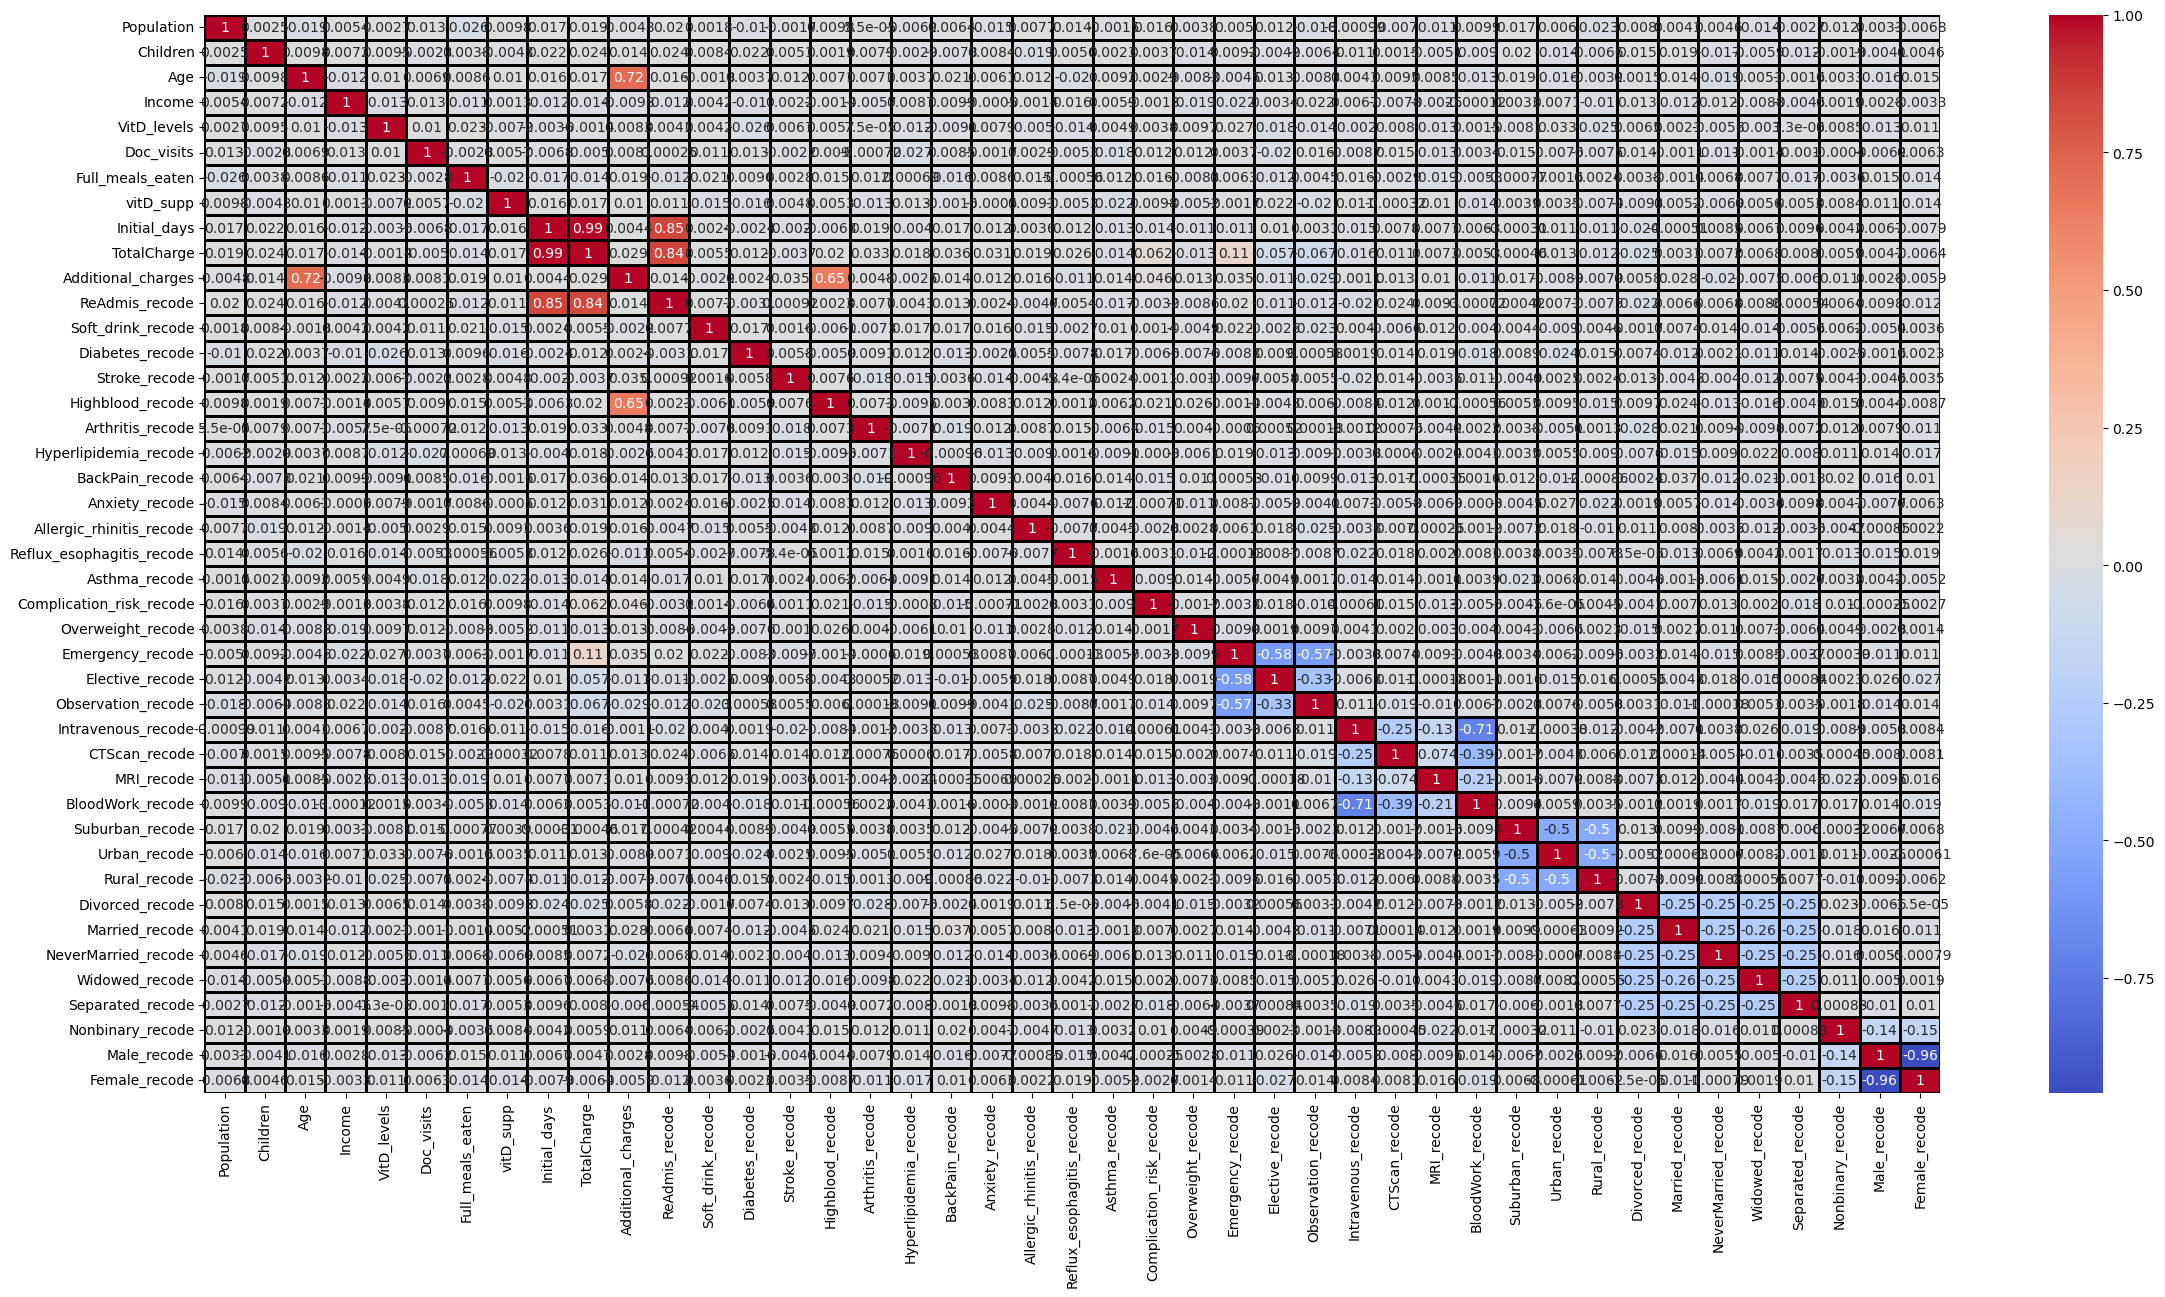

In [9]:
# create heatmap to choose variables that are not highly correlated with eachother
plt.figure(figsize=(28,14))
medical_forcorr=medical_df.select_dtypes(include=np.number)
med_corr=medical_forcorr.corr()
sns.heatmap(med_corr,annot=True,linecolor='black', cmap='coolwarm', linewidths=2)

In [10]:
#scale data prior to saving and analysis
medical_df=medical_df[['Population','Income','Age','Children']]

scaler=StandardScaler()
medical_scaled=scaler.fit_transform(medical_df)
medical_scaled=pd.DataFrame(medical_scaled, columns=medical_df.columns)
print(medical_scaled)

      Population    Income       Age  Children
0      -0.473168  1.615914 -0.024795 -0.507129
1       0.090242  0.221443 -0.121706  0.417277
2       0.482983 -0.915870 -0.024795  0.417277
3      -0.526393 -0.026263  1.186592 -0.969332
4      -0.315586 -1.377325 -1.526914 -0.507129
...          ...       ...       ...       ...
9995   -0.351002  0.192047 -1.381548 -0.044926
9996   -0.587847 -0.894380  1.622691  0.879480
9997   -0.636349  0.891569 -0.412438  0.417277
9998   -0.653956 -0.378271 -0.509349  0.417277
9999    2.128893  0.778133  0.798948  2.728293

[10000 rows x 4 columns]


In [11]:
# saving the dataframe 'medical_prepared' as a CSV file 
medical_scaled.to_csv('medical_prepared.csv', index = 'False')

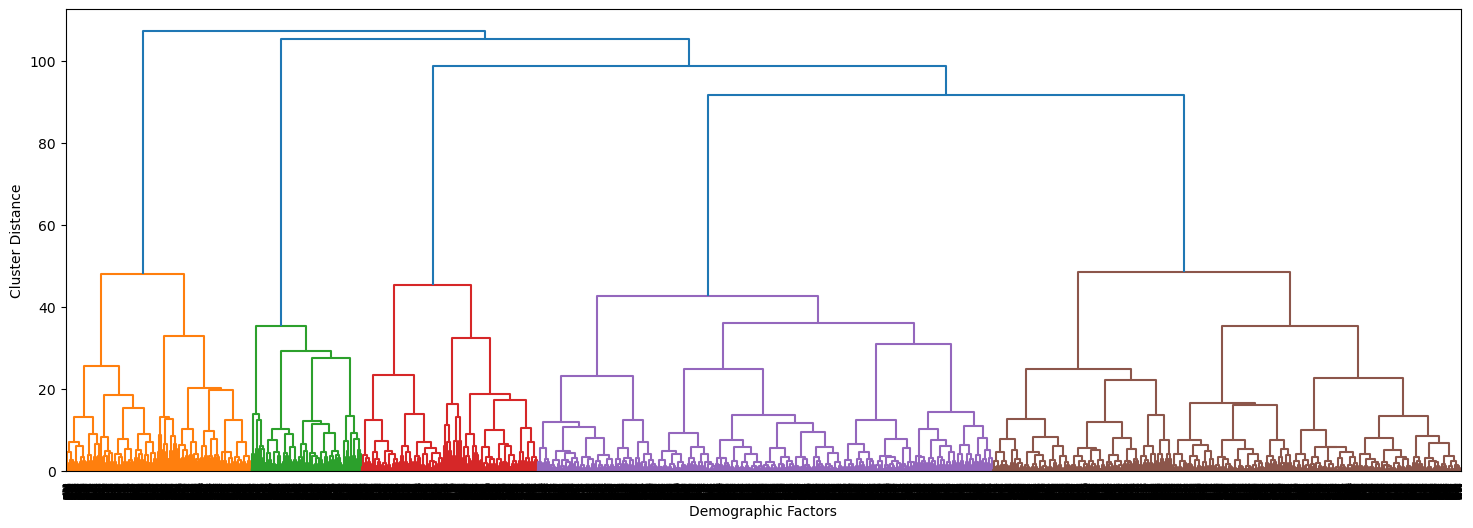

In [12]:
#create distance matrix and dendrogram
distance_matrix=linkage(medical_scaled,
                        method='ward',
                        metric = 'euclidean')

plt.figure(figsize = [18,6])
medical_dend=dendrogram(distance_matrix)
plt.xlabel("Demographic Factors")
plt.ylabel("Cluster Distance");
plt.show()

In [13]:
# Assign cluster labels
medical_scaled['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
print(medical_scaled['cluster_labels'].value_counts().sort_index())

cluster_labels
1    1330
2     792
3    1260
4    3266
5    3352
Name: count, dtype: int64


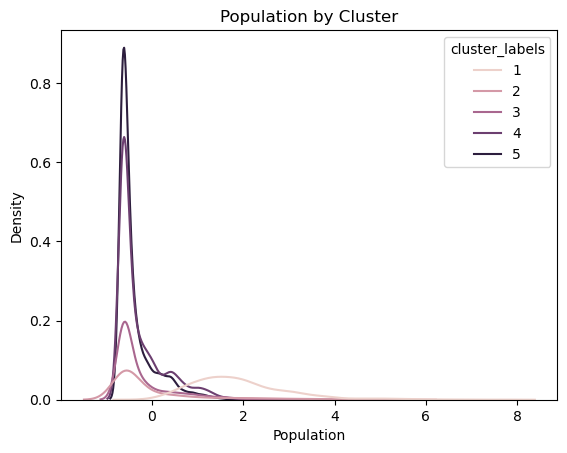

Average population for cluster 1 1.913
Average population for cluster 2 -0.017
Average population for cluster 3 -0.247
Average population for cluster 4 -0.286
Average population for cluster 5 -0.384


In [14]:
#plot showing the difference between cluster characteristics for population variable

sns.kdeplot(data = medical_scaled, x='Population', hue="cluster_labels", legend=True)
plt.title('Population by Cluster')
plt.xlabel("Population")
plt.show();

pop_cluster1_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 1, 'Population'].mean()
pop_cluster2_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 2, 'Population'].mean()
pop_cluster3_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 3, 'Population'].mean()
pop_cluster4_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 4, 'Population'].mean()
pop_cluster5_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 5, 'Population'].mean()

print(f"Average population for cluster 1 {round(pop_cluster1_mean, 3)}")
print(f"Average population for cluster 2 {round(pop_cluster2_mean, 3)}")
print(f"Average population for cluster 3 {round(pop_cluster3_mean, 3)}")
print(f"Average population for cluster 4 {round(pop_cluster4_mean, 3)}")
print(f"Average population for cluster 5 {round(pop_cluster5_mean, 3)}")

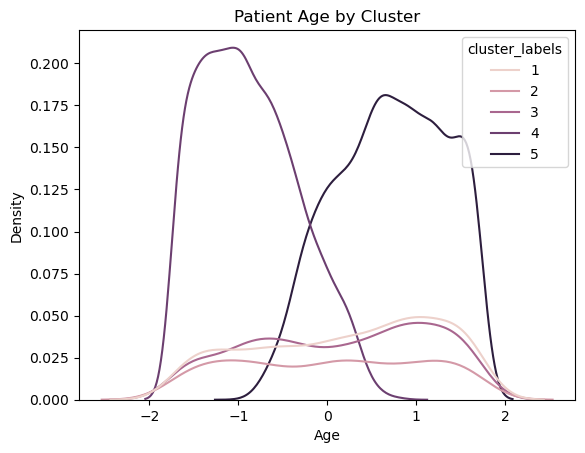

Average patient age for cluster 1 0.209
Average patient age for cluster 2 0.018
Average patient age for cluster 3 0.151
Average patient age for cluster 4 -0.8779
Average patient age for cluster 5 0.71136


In [15]:
#plot showing the difference between cluster characteristics for age variable

sns.kdeplot(data = medical_scaled, x="Age", hue="cluster_labels", legend=True)
plt.title('Patient Age by Cluster')
plt.xlabel("Age")
plt.show();

age_cluster1_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 1, 'Age'].mean()
age_cluster2_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 2, 'Age'].mean()
age_cluster3_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 3, 'Age'].mean()
age_cluster4_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 4, 'Age'].mean()
age_cluster5_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 5, 'Age'].mean()

print(f"Average patient age for cluster 1 {round(age_cluster1_mean, 3)}")
print(f"Average patient age for cluster 2 {round(age_cluster2_mean, 3)}")
print(f"Average patient age for cluster 3 {round(age_cluster3_mean, 3)}")
print(f"Average patient age for cluster 4 {round(age_cluster4_mean, 4)}")
print(f"Average patient age for cluster 5 {round(age_cluster5_mean, 5)}")

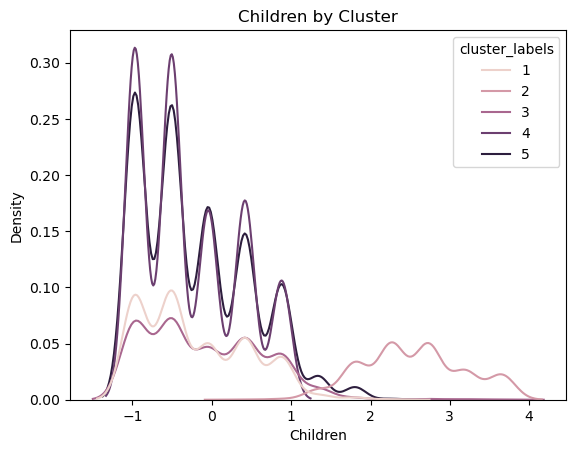

Average number of children for cluster 1 -0.221
Average number of children for cluster 2 2.541
Average number of children for cluster 3 -0.093
Average number of children for cluster 4 -0.28
Average number of children for cluster 5 -0.205


In [16]:
#plot showing the difference between cluster characteristics for children variable

sns.kdeplot(data = medical_scaled, x="Children", hue="cluster_labels")
plt.title('Children by Cluster')
plt.xlabel("Children")
plt.show();

ch_cluster1_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 1, 'Children'].mean()
ch_cluster2_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 2, 'Children'].mean()
ch_cluster3_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 3, 'Children'].mean()
ch_cluster4_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 4, 'Children'].mean()
ch_cluster5_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 5, 'Children'].mean()

print(f"Average number of children for cluster 1 {round(ch_cluster1_mean, 3)}")
print(f"Average number of children for cluster 2 {round(ch_cluster2_mean, 3)}")
print(f"Average number of children for cluster 3 {round(ch_cluster3_mean, 3)}")
print(f"Average number of children for cluster 4 {round(ch_cluster4_mean, 3)}")
print(f"Average number of children for cluster 5 {round(ch_cluster5_mean, 3)}")

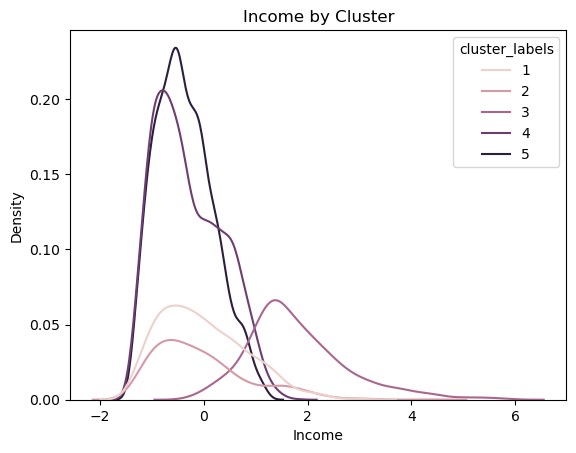

Average income for cluster 1 -0.021
Average income for cluster 2 -0.052
Average income for cluster 3 1.797
Average income for cluster 4 -0.296
Average income for cluster 5 -0.366


In [17]:
#difference between clusters for income variable

sns.kdeplot(data = medical_scaled, x="Income", hue="cluster_labels", legend=True)
plt.title('Income by Cluster')
plt.xlabel("Income")
plt.show();

inc_cluster1_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 1, 'Income'].mean()
inc_cluster2_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 2, 'Income'].mean()
inc_cluster3_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 3, 'Income'].mean()
inc_cluster4_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 4, 'Income'].mean()
inc_cluster5_mean = medical_scaled.loc[medical_scaled['cluster_labels'] == 5, 'Income'].mean()

print(f"Average income for cluster 1 {round(inc_cluster1_mean, 3)}")
print(f"Average income for cluster 2 {round(inc_cluster2_mean, 3)}")
print(f"Average income for cluster 3 {round(inc_cluster3_mean, 3)}")
print(f"Average income for cluster 4 {round(inc_cluster4_mean, 3)}")
print(f"Average income for cluster 5 {round(inc_cluster5_mean, 3)}")

In [18]:
# get silhouette score for accuracy
X = medical_scaled[['Population','Income','Age','Children']]
y = medical_scaled['cluster_labels']

s_score = silhouette_score(X, y, metric='euclidean')
print(round(s_score, 3))

0.22
